In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam_ham_dataset.csv')
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
df.shape

(5171, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


<Axes: xlabel='label'>

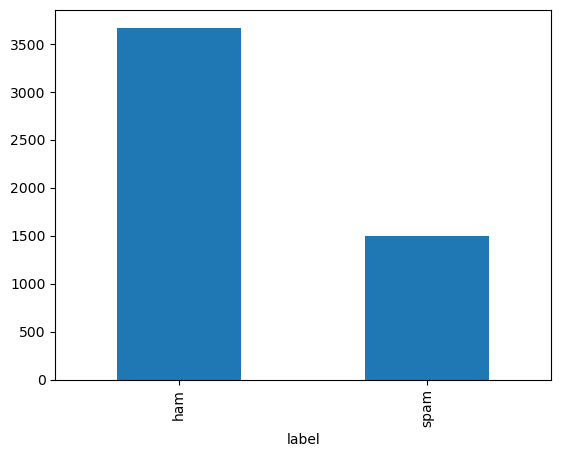

In [4]:
df['label'].value_counts().plot(kind='bar')

In [5]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

## Text Cleaning

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)


In [7]:
df

,Unnamed: 0,label,text,label_num,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january 9 2001 see attached fi...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window office cheap main tre...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put 10 ft transport volume decreased 2...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject 3 4 2000 following noms hpl take extra...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie men...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheet august 2000 activ...


## Feature Enginneering

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['label']

In [9]:
X

array([[0.12144369, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

## Model Building

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)  # Train the model with your training data


RandomForestClassifier()

## Evaluation

In [13]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9816425120772947
Classification Report:
               precision    recall  f1-score   support

         ham       1.00      0.98      0.99       742
        spam       0.95      0.99      0.97       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



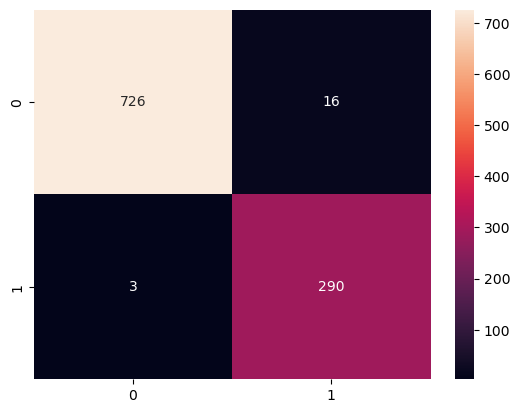

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [15]:
txt=input("Enter Mail")
news=clean_text(str(txt))
pred=clf.predict(vectorizer.transform([news]).toarray())
if pred==0:
    print("Real Mail")
else:
    print("Spam Mail")

Enter Mail hi


Spam Mail


In [16]:
import joblib
joblib.dump(clf, 'spam_mail_classifier.pkl')


['spam_mail_classifier.pkl']

In [17]:
loaded_model='spam_mail_classifier.pkl'

In [18]:
txt = input("Enter Mail")
news = clean_text(str(txt))
pred = clf.predict(vectorizer.transform([news]).toarray())

if pred == 0:
    print("News is Correct")
else:
    print("News is Spam")


Enter Mail hhi


News is Spam
